In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook   # pip install tqdm
from libs import stock_daum, stock_naver

## 실시간 국내증시 인기검색 종목 크롤링

In [2]:
df = stock_naver.get_실시간_국내증시_인기검색종목()
print(df.shape)
df

(10, 4)


,종목코드,direction,거래가,url
종목명,,,,
삼성전자,005930,dn,73200,https://finance.naver.com/item/main.naver?code...
카카오,035720,dn,116500,https://finance.naver.com/item/main.naver?code...
코오롱인더우,120115,dn,44000,https://finance.naver.com/item/main.naver?code...
한국조선해양,009540,dn,97000,https://finance.naver.com/item/main.naver?code...
NAVER,035420,dn,382000,https://finance.naver.com/item/main.naver?code...
TIGER 200 IT,139260,dn,34365,https://finance.naver.com/item/main.naver?code...
현대차,005380,dn,193500,https://finance.naver.com/item/main.naver?code...
ARIRANG 고배당주,161510,dn,12845,https://finance.naver.com/item/main.naver?code...
KODEX 골드선물(H),132030,up,11870,https://finance.naver.com/item/main.naver?code...


## 시각화

<AxesSubplot:xlabel='종목명'>

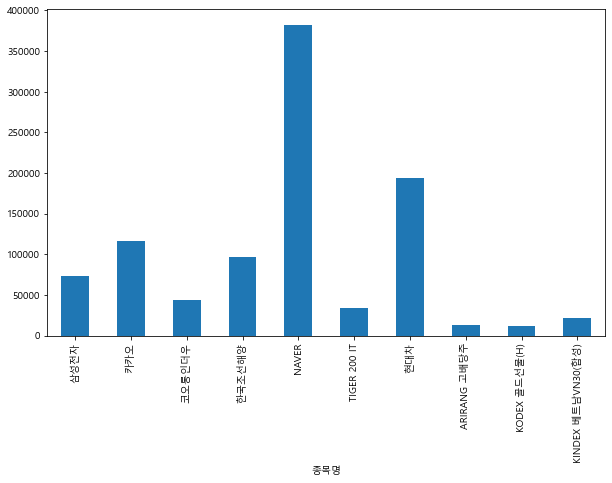

In [7]:
df['거래가'].plot(kind='bar', figsize=(10, 6))

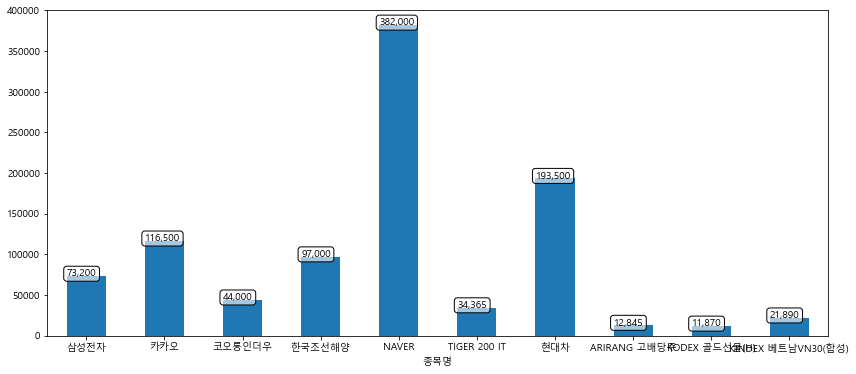

In [8]:
ax = df['거래가'].plot(kind='bar', figsize=(14, 6), rot=0)

# 플롯 수행할 때 ax하나 획득하고 

for p in ax.patches:
    box = p.get_bbox()  # matplotlib.transforms.Bbox 타입 (x0, y0, x1, y1 속성)
    
    x = box.xmin # 위치를 이렇게 획득한 다음에
    y = box.ymax # 위치를 이렇게 획득한 다음에
    text = "{:,}".format(int(y))
    
    # https://matplotlib.org/users/annotations.html
    ax.text(x, y, text, bbox={'boxstyle': 'round', 'fc': '#ffffff99'})

In [13]:
import xlwings as xw

In [22]:
name = '실시간 국내증시 인기검색 종목 시각화'
sheet = xw.sheets.active

sheet.range('N1').value = name
sheet.range('N2').value = df[['거래가']]

<Picture '실시간 국내증시 인기검색 종목 시각화' in <Sheet [통합 문서1]Sheet4>>

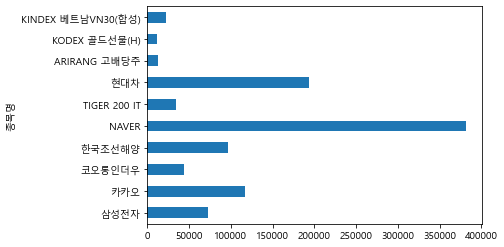

In [23]:
df['거래가'].plot(kind='barh')

left = sheet.range('P2').left
top = sheet.range('P2').top

sheet.pictures.add(ax.figure, name=name, update=True, left=left, top=top)